In [1]:
import pandas as pd
import tensorflow as tf
import tensorflow.keras.layers as layers
import matplotlib.pyplot as plt
import numpy as np
from imblearn.over_sampling import SMOTE

In [2]:
#The dataset contains no header for columns, hence the header parameter
train=pd.read_csv('./mitbih_train.csv',header=None)
test=pd.read_csv('./mitbih_test.csv',header=None)

In [3]:
#Last column is the category column, a scaler value from 0 to 4
y_train=train[train.columns[-1:]]
x_train=train[train.columns[:-1]]
y_test=test[test.columns[-1:]]
x_test=test[test.columns[:-1]]

In [4]:
print(len(y_train[y_train[187] ==0 ]))
print(len(y_train[y_train[187] ==1 ]))
print(len(y_train[y_train[187] ==2 ]))
print(len(y_train[y_train[187] ==3 ]))
print(len(y_train[y_train[187] ==4 ]))

72471
2223
5788
641
6431


In [5]:
y_train=y_train.to_numpy()
x_train=x_train.to_numpy()
#Change the value to only use a subset of the dataset (like for quick tests...)
x_train=x_train[:362355][:][:]
y_train=y_train[:362355][:]
#Add data dimension, doesn't actually change the data but that's how the input is expected, like it could have multiple values per timestamp
x_train=x_train.reshape([-1,187,1])

In [6]:
y_test=y_test.to_numpy()
x_test=x_test.to_numpy()
#Change the value to only use a subset of the dataset (like for quick tests...)
x_test=x_test[:362355][:][:]
y_test=y_test[:362355][:]
#Add data dimension, doesn't actually change the data but that's how the input is expected, like it could have multiple values per timestamp
x_test=x_test.reshape([-1,187,1])

In [7]:
model=tf.keras.Sequential([
    layers.Conv1D(7, 7, activation='relu', input_shape=(187,1)),
    layers.BatchNormalization(),
    layers.MaxPool1D(),
    layers.Conv1D(5,5,activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPool1D(),
    layers.Conv1D(3,3,activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPool1D(),
    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(32,activation='relu'),
    layers.Dense(5,activation='softmax') #softmax cuz categories
])

In [8]:
model.compile('adam','sparse_categorical_crossentropy',metrics=['accuracy']) #this was with validation
history=model.fit(x_train,y_train,batch_size=1000,epochs=15,verbose=True)

Epoch 1/15
88/88 [==============================] - 9s 81ms/step - loss: 0.7380 - accuracy: 0.7504
Epoch 2/15
88/88 [==============================] - 7s 80ms/step - loss: 0.3498 - accuracy: 0.8922
Epoch 3/15
88/88 [==============================] - 8s 87ms/step - loss: 0.2510 - accuracy: 0.9244
Epoch 4/15
88/88 [==============================] - 8s 85ms/step - loss: 0.2006 - accuracy: 0.9425
Epoch 5/15
88/88 [==============================] - 8s 87ms/step - loss: 0.1709 - accuracy: 0.9515
Epoch 6/15
88/88 [==============================] - 6s 65ms/step - loss: 0.1526 - accuracy: 0.9569
Epoch 7/15
88/88 [==============================] - 6s 63ms/step - loss: 0.1393 - accuracy: 0.9610
Epoch 8/15
88/88 [==============================] - 6s 63ms/step - loss: 0.1301 - accuracy: 0.9637
Epoch 9/15
88/88 [==============================] - 6s 63ms/step - loss: 0.1225 - accuracy: 0.9662
Epoch 10/15
88/88 [==============================] - 6s 64ms/step - loss: 0.1158 - accuracy: 0.9681
Epoch 11/

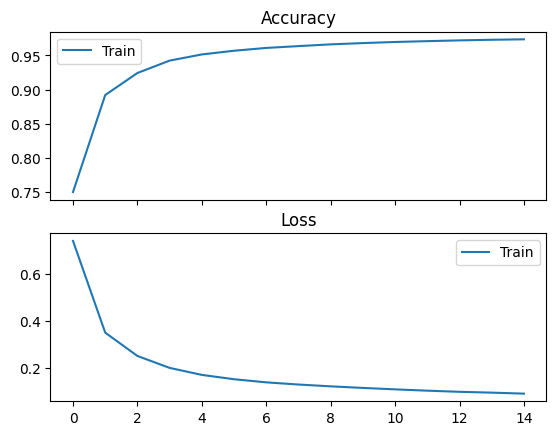

In [9]:
fig, ax = plt.subplots(2,sharex=True)
ax[0].set_title("Accuracy")
ax[0].plot(history.epoch, history.history['accuracy'],label='Train');
# ax[0].plot(history.epoch, history.history['val_accuracy'],label='Validation');
ax[0].legend()
ax[1].set_title("Loss")
ax[1].plot(history.epoch, history.history['loss'],label='Train');
# ax[1].plot(history.epoch, history.history['val_loss'],label='Validation');
ax[1].legend()

In [10]:
model.evaluate(x_test, y_test, verbose=True)

685/685 [==============================] - 2s 2ms/step - loss: 0.1124 - accuracy: 0.9699


[0.11235596239566803, 0.9698520302772522]

In [12]:
from sklearn.metrics import classification_report
y_pred = model.predict(x_test)
y_pred = np.argmax(y_pred, axis=1)

print(classification_report(y_test, y_pred))

685/685 [==============================] - 2s 2ms/step
              precision    recall  f1-score   support

         0.0       0.98      0.99      0.98     18118
         1.0       0.90      0.59      0.71       556
         2.0       0.89      0.91      0.90      1448
         3.0       0.74      0.60      0.66       162
         4.0       0.97      0.96      0.97      1608

    accuracy                           0.97     21892
   macro avg       0.90      0.81      0.85     21892
weighted avg       0.97      0.97      0.97     21892

